In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
df = pd.read_excel("Enhanced_pizza_sell_data_2024-25.xlsx")

In [284]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [286]:
df = df.drop(columns = ['Order ID','Order Time', 'Is Peak Hour','Is Weekend','Delivery Time','Pizza Complexity','Traffic Impact','Order Hour',
                        'Delivery Efficiency (min/km)','Order Month','Estimated Duration (min)','Delay (min)','Restaurant Avg Time'])

In [288]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,Domino's,"New York, NY",15,Medium,Veg,3,2.5,Medium,Card,1.200000,Online,False
1,Papa John's,"Los Angeles, CA",25,Large,Non-Veg,4,5.0,High,Wallet,0.800000,Online,False
2,Little Caesars,"Chicago, IL",20,Small,Vegan,2,3.0,Low,UPI,0.666667,Online,False
3,Pizza Hut,"Miami, FL",25,XL,Cheese Burst,5,4.5,Medium,Cash,1.111111,Offline,False
4,Marco's Pizza,"Dallas, TX",20,Medium,Non-Veg,3,2.0,High,Card,1.500000,Online,False


In [290]:
df.shape

(1004, 12)

In [292]:
df.columns

Index(['Restaurant Name', 'Location', 'Delivery Duration (min)', 'Pizza Size',
       'Pizza Type', 'Toppings Count', 'Distance (km)', 'Traffic Level',
       'Payment Method', 'Topping Density', 'Payment Category', 'Is Delayed'],
      dtype='object')

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   object 
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   object 
 4   Pizza Type               1004 non-null   object 
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   object 
 8   Payment Method           1004 non-null   object 
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 87.4+ KB


In [298]:
df.isnull().sum()

Restaurant Name            0
Location                   0
Delivery Duration (min)    0
Pizza Size                 0
Pizza Type                 0
Toppings Count             0
Distance (km)              0
Traffic Level              0
Payment Method             0
Topping Density            0
Payment Category           0
Is Delayed                 0
dtype: int64

In [300]:
df.describe()

,Delivery Duration (min),Toppings Count,Distance (km),Topping Density
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,29.492032,3.362550,4.945618,0.714684
std,7.753103,1.135853,1.951463,0.203020
min,15.000000,1.000000,2.000000,0.266667
25%,25.000000,3.000000,3.500000,0.600000
50%,30.000000,3.000000,4.500000,0.666667
75%,30.000000,4.000000,6.000000,0.833333
max,50.000000,5.000000,10.000000,1.500000


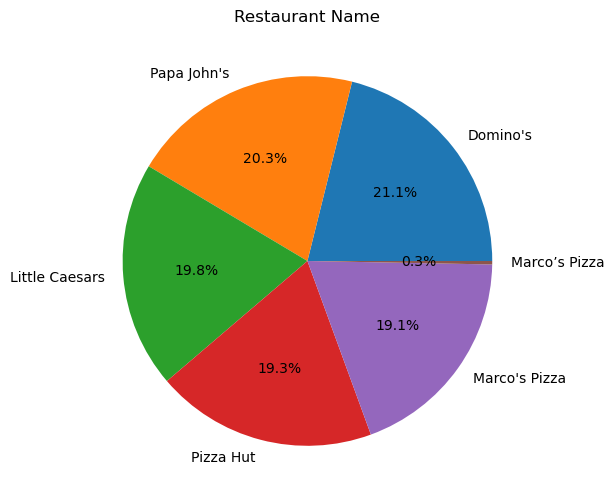

In [302]:
features = ['Restaurant Name']

plt.figure(figsize=(7, 6))
x = df[features[0]].value_counts()
plt.pie(x.values, labels=x.index, autopct="%1.1f%%")
plt.title(features[0])
plt.show()

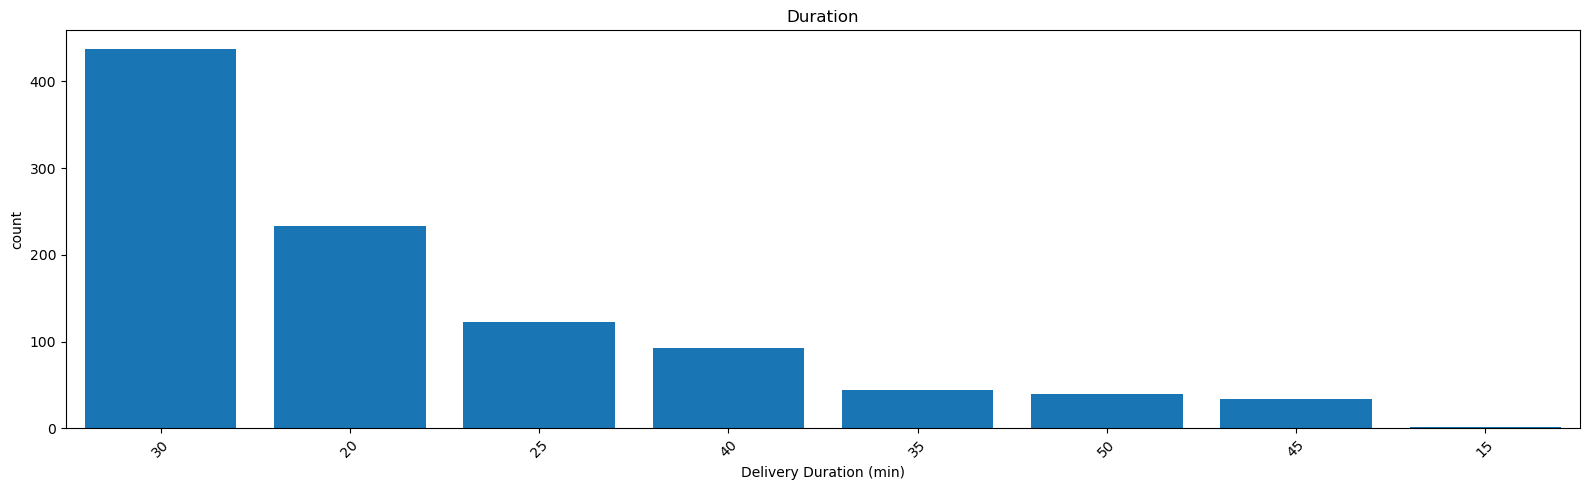

In [304]:
plt.figure(figsize=(16, 5))
plt.title('Duration')
sns.countplot(
    data=df,
    x='Delivery Duration (min)',
    order=df['Delivery Duration (min)'].value_counts().index,
    color='#007acc' 
)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

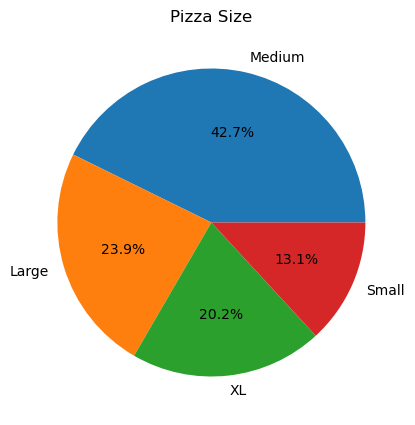

In [306]:
features = ['Pizza Size']

plt.figure(figsize=(7, 5))
x = df[features[0]].value_counts()
plt.pie(x.values, labels=x.index, autopct="%1.1f%%")
plt.title(features[0])
plt.show()

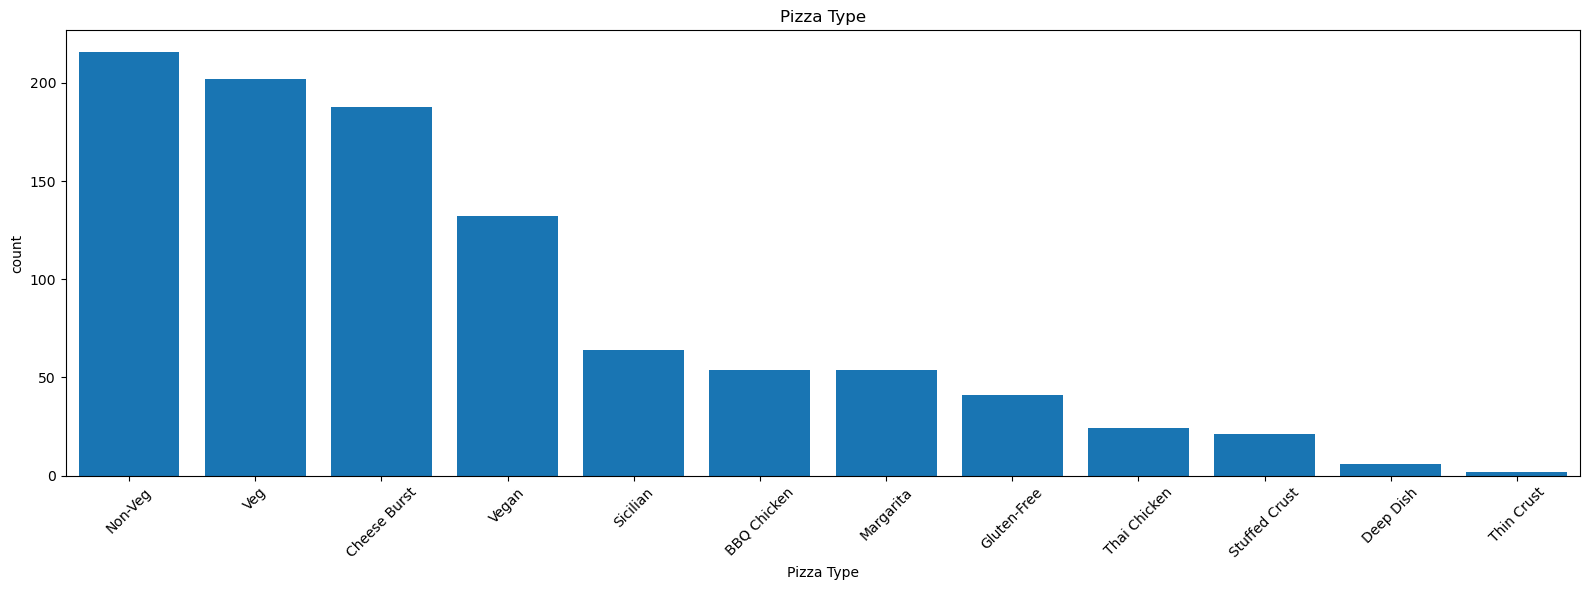

In [308]:
plt.figure(figsize=(16, 6))
plt.title('Pizza Type')
sns.countplot(
    data=df,
    x='Pizza Type',
    order=df['Pizza Type'].value_counts().index,
    color='#007acc' 
)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

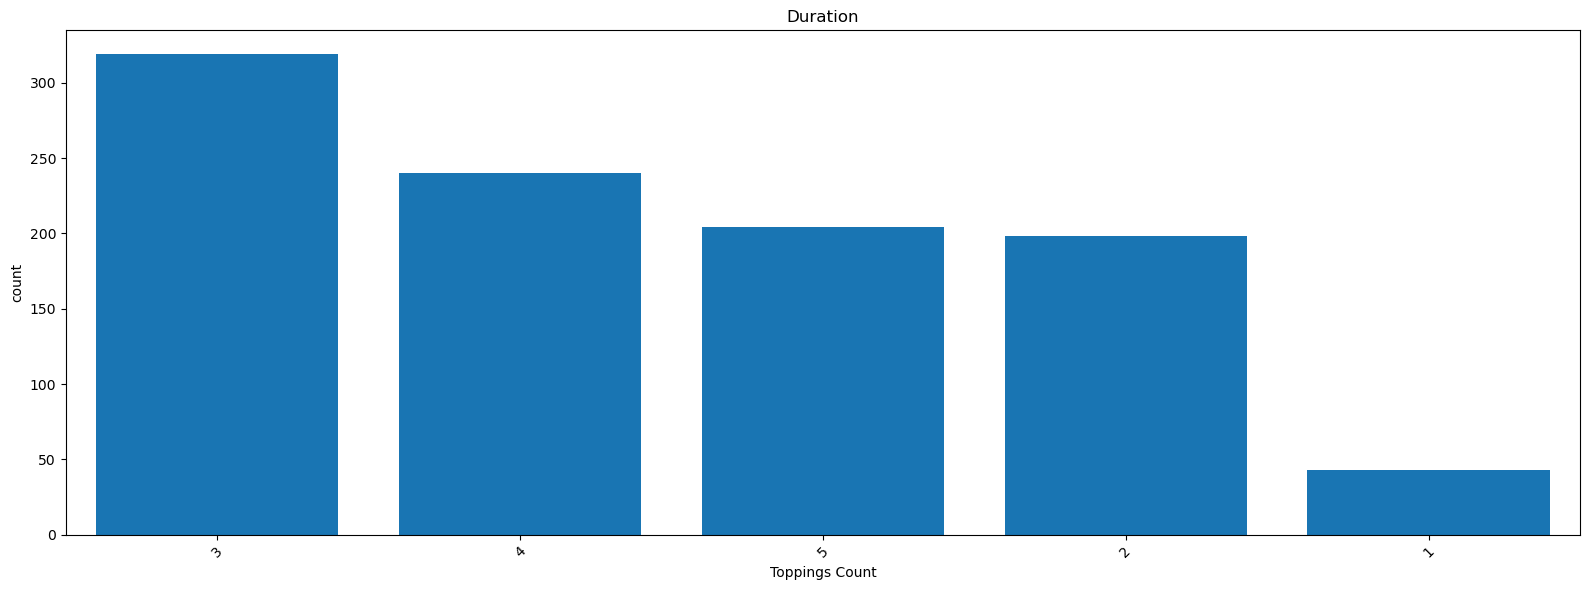

In [310]:
plt.figure(figsize=(16, 6))
plt.title('Duration')
sns.countplot(
    data=df,
    x='Toppings Count',
    order=df['Toppings Count'].value_counts().index,
    color='#007acc' 
)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

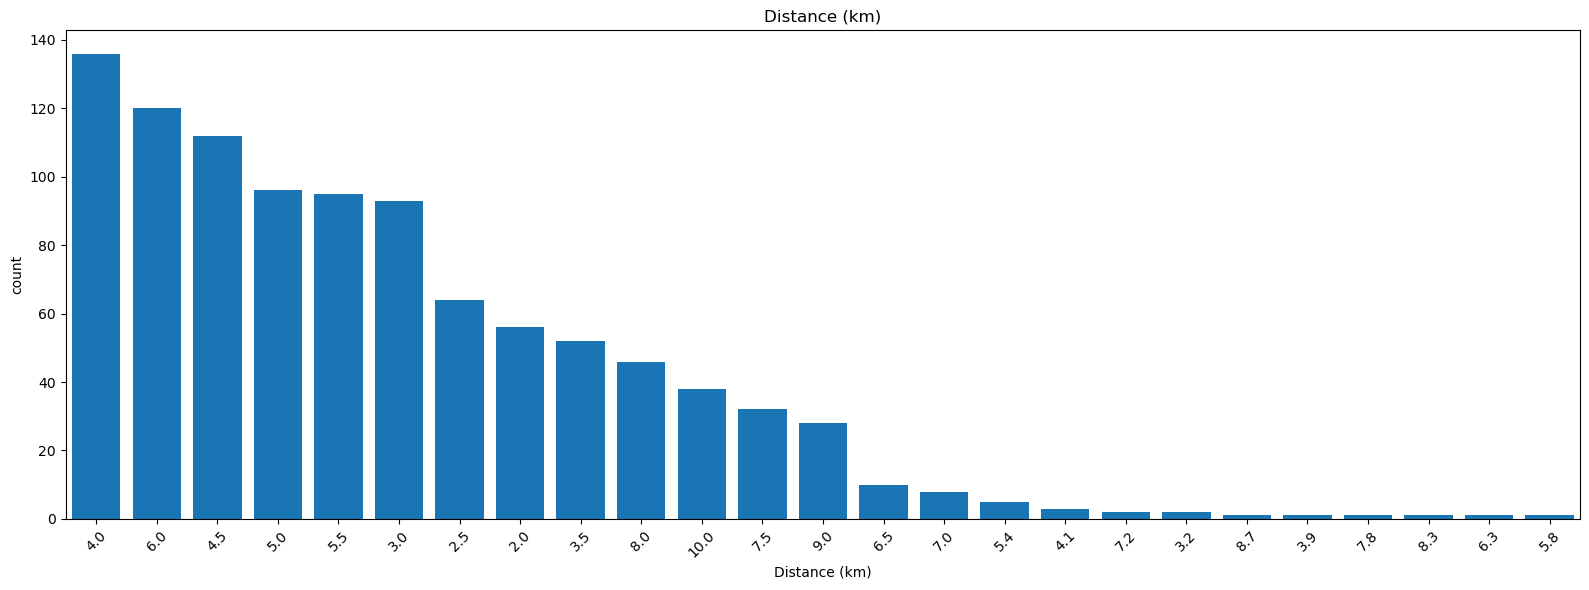

In [312]:
plt.figure(figsize=(16, 6))
plt.title('Distance (km)')
sns.countplot(
    data=df,
    x='Distance (km)',
    order=df['Distance (km)'].value_counts().index,
    color='#007acc' 
)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

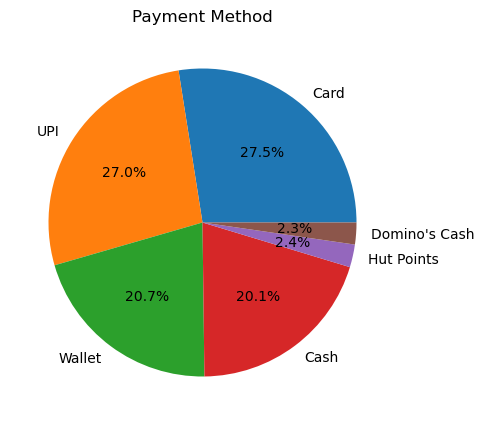

In [314]:
features = ['Payment Method']
plt.figure(figsize=(7,5))
x = df[features[0]].value_counts()
plt.pie(x.values, labels = x.index,autopct ="%1.1f%%")
plt.title(features[0])
plt.show()

In [316]:
df.columns

Index(['Restaurant Name', 'Location', 'Delivery Duration (min)', 'Pizza Size',
       'Pizza Type', 'Toppings Count', 'Distance (km)', 'Traffic Level',
       'Payment Method', 'Topping Density', 'Payment Category', 'Is Delayed'],
      dtype='object')

In [318]:
df['Restaurant Name'].unique()

array(["Domino's", "Papa John's", 'Little Caesars', 'Pizza Hut',
       "Marco's Pizza", 'Marco’s Pizza'], dtype=object)

In [320]:
df['Pizza Size'].unique()

array(['Medium', 'Large', 'Small', 'XL'], dtype=object)

In [322]:
df['Pizza Type'].unique()

array(['Veg', 'Non-Veg', 'Vegan', 'Cheese Burst', 'Gluten-Free',
       'Stuffed Crust', 'Thin Crust', 'Deep Dish', 'Thai Chicken',
       'Sicilian', 'BBQ Chicken', 'Margarita'], dtype=object)

In [324]:
df['Traffic Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [326]:
df['Payment Method'].unique()

array(['Card', 'Wallet', 'UPI', 'Cash', "Domino's Cash", 'Hut Points'],
      dtype=object)

In [328]:
df['Payment Category'].unique()

array(['Online', 'Offline'], dtype=object)

In [330]:
df['Is Delayed'].unique()

array([False,  True])

In [332]:
df['Is Delayed'].value_counts()

Is Delayed
False    794
True     210
Name: count, dtype: int64

In [334]:
df['Restaurant Name'] = df['Restaurant Name'].map({"Domino's": 0, "Papa John's": 1,'Little Caesars':2, 'Pizza Hut': 3,
       "Marco's Pizza": 4, "Marco’s Pizza": 5})

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   object 
 4   Pizza Type               1004 non-null   object 
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   object 
 8   Payment Method           1004 non-null   object 
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 87.4+ KB


In [338]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,Medium,Veg,3,2.5,Medium,Card,1.200000,Online,False
1,1,"Los Angeles, CA",25,Large,Non-Veg,4,5.0,High,Wallet,0.800000,Online,False
2,2,"Chicago, IL",20,Small,Vegan,2,3.0,Low,UPI,0.666667,Online,False
3,3,"Miami, FL",25,XL,Cheese Burst,5,4.5,Medium,Cash,1.111111,Offline,False
4,4,"Dallas, TX",20,Medium,Non-Veg,3,2.0,High,Card,1.500000,Online,False


In [340]:
df['Pizza Size'] = df['Pizza Size'].map({'Medium': 0, 'Large': 1, 'Small': 2, 'XL': 3})

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   int64  
 4   Pizza Type               1004 non-null   object 
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   object 
 8   Payment Method           1004 non-null   object 
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 87.4+ KB


In [344]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,0,Veg,3,2.5,Medium,Card,1.200000,Online,False
1,1,"Los Angeles, CA",25,1,Non-Veg,4,5.0,High,Wallet,0.800000,Online,False
2,2,"Chicago, IL",20,2,Vegan,2,3.0,Low,UPI,0.666667,Online,False
3,3,"Miami, FL",25,3,Cheese Burst,5,4.5,Medium,Cash,1.111111,Offline,False
4,4,"Dallas, TX",20,0,Non-Veg,3,2.0,High,Card,1.500000,Online,False


In [346]:
df['Pizza Type'] = df['Pizza Type'].map({'Veg':0, 'Non-Veg': 1, 'Vegan': 2, 'Cheese Burst': 3, 'Gluten-Free': 4,
       'Stuffed Crust':5,'Thin Crust':6, 'Deep Dish':7, 'Thai Chicken':8,
       'Sicilian':9, 'BBQ Chicken':10, 'Margarita' : 11})

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   int64  
 4   Pizza Type               1004 non-null   int64  
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   object 
 8   Payment Method           1004 non-null   object 
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 87.4+ KB


In [350]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,0,0,3,2.5,Medium,Card,1.200000,Online,False
1,1,"Los Angeles, CA",25,1,1,4,5.0,High,Wallet,0.800000,Online,False
2,2,"Chicago, IL",20,2,2,2,3.0,Low,UPI,0.666667,Online,False
3,3,"Miami, FL",25,3,3,5,4.5,Medium,Cash,1.111111,Offline,False
4,4,"Dallas, TX",20,0,1,3,2.0,High,Card,1.500000,Online,False


In [352]:
df['Traffic Level'] = df['Traffic Level'].map({'Medium': 0, 'High':1, 'Low': 2})

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   int64  
 4   Pizza Type               1004 non-null   int64  
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   int64  
 8   Payment Method           1004 non-null   object 
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   bool   
dtypes: bool(1), float64(2), int64(6), object(3)
memory usage: 87.4+ KB


In [356]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,0,0,3,2.5,0,Card,1.200000,Online,False
1,1,"Los Angeles, CA",25,1,1,4,5.0,1,Wallet,0.800000,Online,False
2,2,"Chicago, IL",20,2,2,2,3.0,2,UPI,0.666667,Online,False
3,3,"Miami, FL",25,3,3,5,4.5,0,Cash,1.111111,Offline,False
4,4,"Dallas, TX",20,0,1,3,2.0,1,Card,1.500000,Online,False


In [358]:
df['Payment Method'] = df['Payment Method'].map({'Card': 0, 'Wallet': 1, 'UPI': 2, 'Cash': 3, "Domino's Cash": 4,'Hut Points' : 5})

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   int64  
 4   Pizza Type               1004 non-null   int64  
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   int64  
 8   Payment Method           1004 non-null   int64  
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   bool   
dtypes: bool(1), float64(2), int64(7), object(2)
memory usage: 87.4+ KB


In [364]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,0,0,3,2.5,0,0,1.200000,Online,False
1,1,"Los Angeles, CA",25,1,1,4,5.0,1,1,0.800000,Online,False
2,2,"Chicago, IL",20,2,2,2,3.0,2,2,0.666667,Online,False
3,3,"Miami, FL",25,3,3,5,4.5,0,3,1.111111,Offline,False
4,4,"Dallas, TX",20,0,1,3,2.0,1,0,1.500000,Online,False


In [366]:
# Convert string 'True'/'False' to actual bool
if df['Is Delayed'].dtype == 'object':
    df['Is Delayed'] = df['Is Delayed'].map({'False': False, 'True': True})

# Then convert boolean to integer
df['Is Delayed'] = df['Is Delayed'].astype(int)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   int64  
 4   Pizza Type               1004 non-null   int64  
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   int64  
 8   Payment Method           1004 non-null   int64  
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   object 
 11  Is Delayed               1004 non-null   int32  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 90.3+ KB


In [370]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,0,0,3,2.5,0,0,1.200000,Online,0
1,1,"Los Angeles, CA",25,1,1,4,5.0,1,1,0.800000,Online,0
2,2,"Chicago, IL",20,2,2,2,3.0,2,2,0.666667,Online,0
3,3,"Miami, FL",25,3,3,5,4.5,0,3,1.111111,Offline,0
4,4,"Dallas, TX",20,0,1,3,2.0,1,0,1.500000,Online,0


In [372]:
df['Payment Category'] = df['Payment Category'].map({'Online': 0, 'Offline' : 1})

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          1004 non-null   int64  
 1   Location                 1004 non-null   object 
 2   Delivery Duration (min)  1004 non-null   int64  
 3   Pizza Size               1004 non-null   int64  
 4   Pizza Type               1004 non-null   int64  
 5   Toppings Count           1004 non-null   int64  
 6   Distance (km)            1004 non-null   float64
 7   Traffic Level            1004 non-null   int64  
 8   Payment Method           1004 non-null   int64  
 9   Topping Density          1004 non-null   float64
 10  Payment Category         1004 non-null   int64  
 11  Is Delayed               1004 non-null   int32  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 90.3+ KB


In [376]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,"New York, NY",15,0,0,3,2.5,0,0,1.200000,0,0
1,1,"Los Angeles, CA",25,1,1,4,5.0,1,1,0.800000,0,0
2,2,"Chicago, IL",20,2,2,2,3.0,2,2,0.666667,0,0
3,3,"Miami, FL",25,3,3,5,4.5,0,3,1.111111,1,0
4,4,"Dallas, TX",20,0,1,3,2.0,1,0,1.500000,0,0


In [380]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df.Location.values)

In [382]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Topping Density,Payment Category,Is Delayed
0,0,53,15,0,0,3,2.5,0,0,1.200000,0,0
1,1,42,25,1,1,4,5.0,1,1,0.800000,0,0
2,2,14,20,2,2,2,3.0,2,2,0.666667,0,0
3,3,48,25,3,3,5,4.5,0,3,1.111111,1,0
4,4,19,20,0,1,3,2.0,1,0,1.500000,0,0


In [384]:
X = df.drop(columns = ['Is Delayed'])
y = df['Is Delayed']

In [386]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [388]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [390]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [392]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [394]:
y_pred = model.predict(X_test)

In [396]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1])

In [402]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
 [[159   0]
 [  0  42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00        42

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [404]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation accuracy: 0.9980099502487562


C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [406]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

ROC-AUC: 1.0


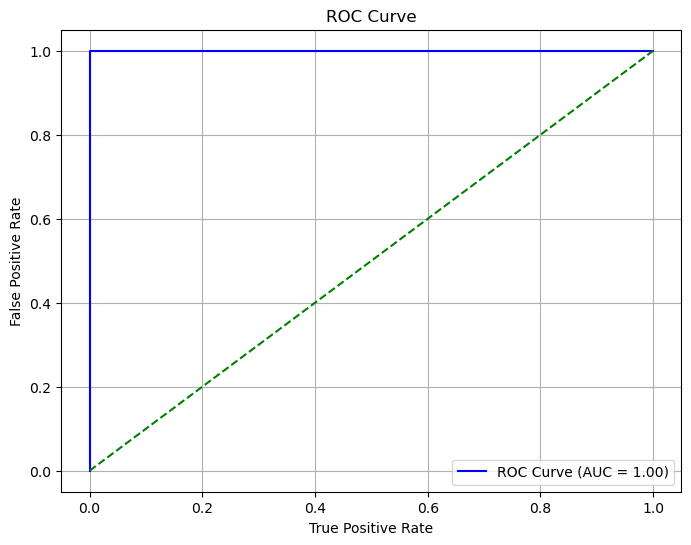

In [408]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [410]:
y_pred = model.predict([[0,	53, 15,	1,	1	,3	,5	,0	,0	,1.200000,0	]])
y_pred

array([1])

In [412]:
import pickle
pickle.dump(model, open("pizza.pkl","wb"))